<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/P3/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inventario

## Librerías

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Demanda mensual

In [85]:
Probablidad_empirica = {
    'Cantidad': [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
    'Probabilidad': [0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.060, 0.065, 0.070, 0.080, 0.075, 0.070, 0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005]
}

Demanda = pd.DataFrame(Probablidad_empirica)
Demanda

,Cantidad,Probabilidad
0,35,0.010
1,36,0.015
2,37,0.020
3,38,0.020
4,39,0.022
5,40,0.023
6,41,0.025
7,42,0.027
8,43,0.028
9,44,0.029


## Tiempo de entrega

In [86]:
Tiempo_entrega = {
    'Meses' : [1, 2, 3],
    'Probabilidad' : [0.30, 0.40, 0.30]
}

Tiempo = pd.DataFrame(Tiempo_entrega)
Tiempo

,Meses,Probabilidad
0,1,0.3
1,2,0.4
2,3,0.3


## Factores estacionales

In [87]:
Factores_estacionales = {
    'Mes' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Factores estacionales' : [1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40]
}

Factores = pd.DataFrame(Factores_estacionales)
Factores

,Mes,Factores estacionales
0,1,1.2
1,2,1.0
2,3,0.9
3,4,0.8
4,5,0.8
5,6,0.7
6,7,0.8
7,8,0.9
8,9,1.0
9,10,1.2


## Costos

In [112]:
Costo_orden = 100
Costo_inventario = 20
Costo_faltante = 50
Inventario_inicial = 150

## Transformada inversa para valores de demanda

In [89]:
# Transformada inversa para valores de demanda
def transformada_inversa(probabilidad):
  acumulada = 0
  for i in range(len(Demanda['Probabilidad'])):
    acumulada += Demanda['Probabilidad'][i]
    if acumulada >= probabilidad:
      return Demanda['Cantidad'][i]

# Cantidad óptima a ordenar
demanda_promedio = np.sum(Demanda['Cantidad'] * Demanda['Probabilidad'])
tiempo_entrega_promedio = np.sum(Tiempo['Meses'] * Tiempo['Probabilidad'])
nivel_optimo_reorden = demanda_promedio * tiempo_entrega_promedio - Inventario_inicial

cantidad_optima_ordenar = transformada_inversa(1 - (Costo_orden / (Costo_inventario + Costo_faltante))) - nivel_optimo_reorden

print("Cantidad óptima a ordenar:", cantidad_optima_ordenar)
print("Nivel óptimo de reorden:", nivel_optimo_reorden)


Cantidad óptima a ordenar: 87.42999999999999
Nivel óptimo de reorden: -52.42999999999999


## Simulación

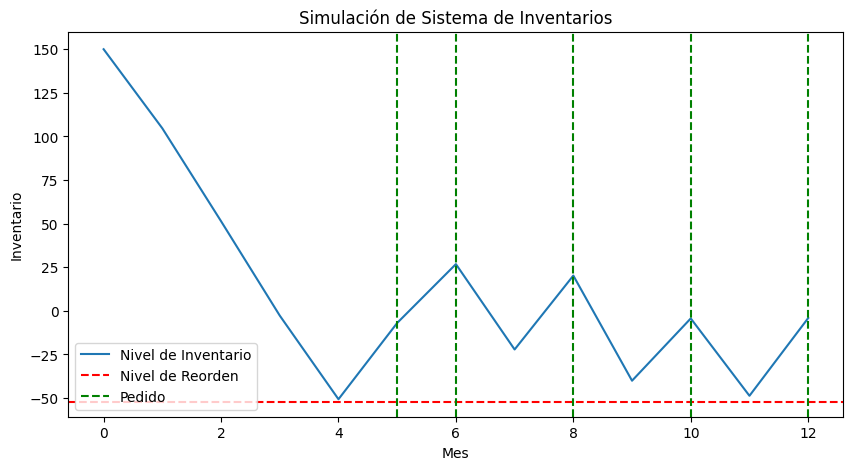

In [90]:
# Parámetros de la simulación
tiempo_simulacion = 12  # Meses
nivel_reorden = nivel_optimo_reorden       # Nivel de inventario para reordenar
cantidad_pedido = cantidad_optima_ordenar  # Cantidad a pedir
demanda_media = demanda_promedio          # Media de la demanda
varianza = np.sum(Demanda['Probabilidad'] * (Demanda['Cantidad'] - demanda_promedio) ** 2) / np.sum(Demanda['Probabilidad'])  # Varianza de la demanda
demanda_estandar = np.sqrt(varianza)      # Desviación estándar de la demanda

# Inicialización
inventario = [150]  # Inventario inicial
pedidos = []

# Simulación
for mes in range(1, tiempo_simulacion + 1):
    demanda = max(0, np.random.normal(demanda_media, demanda_estandar))
    inventario_actual = inventario[-1] - demanda

    if inventario_actual < nivel_reorden:
        inventario_actual += cantidad_pedido
        pedidos.append(mes)

    inventario.append(inventario_actual)

# Resultados
plt.figure(figsize=(10, 5))
plt.plot(inventario, label='Nivel de Inventario')
plt.axhline(y=nivel_reorden, color='r', linestyle='--', label='Nivel de Reorden')
for pedido in pedidos:
    plt.axvline(x=pedido, color='g', linestyle='--', label='Pedido' if pedido == pedidos[0] else "")
plt.xlabel('Mes')
plt.ylabel('Inventario')
plt.title('Simulación de Sistema de Inventarios')
plt.legend()
plt.show()

In [92]:
# Parámetros
tiempo_simulacion = 12  # Meses
nivel_reorden = nivel_optimo_reorden       # Nivel de inventario para reordenar
cantidad_pedido = cantidad_optima_ordenar  # Cantidad a pedir
inventario_inicial = 150  # Inventario inicial

# Demanda mensual
def transformada_inversa(probabilidad):
  acumulada = 0
  for i in range(len(Demanda['Probabilidad'])):
    acumulada += Demanda['Probabilidad'][i]
    if acumulada >= probabilidad:
      return Demanda['Cantidad'][i]

demanda_mensual = [transformada_inversa(p) for p in np.random.uniform(0, 1, tiempo_simulacion)]

# Resultados simulación
Simulacion = {
    'Mes': np.arange(1, tiempo_simulacion + 1),
    'Inventario Inicial': np.zeros(tiempo_simulacion),
    'Demanda': demanda_mensual,
    'Inventario Final': np.zeros(tiempo_simulacion),
    'Órdenes': np.zeros(tiempo_simulacion)
}

Resultados = pd.DataFrame(Simulacion)

# Simulación del sistema de inventarios
inventario = inventario_inicial
for i in range(tiempo_simulacion):
    Resultados.at[i, 'Inventario Inicial'] = inventario
    inventario -= Resultados.at[i, 'Demanda']
    if inventario <= nivel_optimo_reorden:
        orden = cantidad_pedido
        inventario += orden
        Resultados.at[i, 'Órdenes'] = orden
    Resultados.at[i, 'Inventario Final'] = inventario

Resultados

,Mes,Inventario Inicial,Demanda,Inventario Final,Órdenes
0,1,150.00,51,99.00,0.00
1,2,99.00,53,46.00,0.00
2,3,46.00,48,-2.00,0.00
3,4,-2.00,50,-52.00,0.00
4,5,-52.00,46,-10.57,87.43
5,6,-10.57,60,16.86,87.43
6,7,16.86,50,-33.14,0.00
7,8,-33.14,59,-4.71,87.43
8,9,-4.71,56,26.72,87.43
9,10,26.72,52,-25.28,0.00


In [93]:
# Costos anuales totales
costo_total = Costo_orden * np.sum(Resultados['Órdenes']) + Costo_inventario * np.mean(Resultados['Inventario Final']) + Costo_faltante * np.sum(np.where(Resultados['Inventario Final'] < 0, -Resultados['Inventario Final'], 0))

# Tabla de costos
tabla_costos = pd.DataFrame({
    'Costo de órdenes': [Costo_orden * np.sum(Resultados['Órdenes'])],
    'Costo de inventario': [Costo_inventario * np.mean(Resultados['Inventario Final'])],
    'Costo de faltantes': [Costo_faltante * np.sum(np.where(Resultados['Inventario Final'] < 0, -Resultados['Inventario Final'], 0))],
    'Costo total': [costo_total]
})

tabla_costos


,Costo de órdenes,Costo de inventario,Costo de faltantes,Costo total
0,43715.0,61.966667,8377.5,52154.466667


## Solución óptima


**Algoritmo de Wagner-Whitin**: Permite determinar las cantidades óptimas de pedido para minimizar costos.


In [111]:
# Parámetros
demanda_promedio = np.sum(Demanda['Cantidad'] * Demanda['Probabilidad'])
tiempo_entrega_promedio = np.sum(Tiempo['Meses'] * Tiempo['Probabilidad'])
inventario_inicial = 150
costo_orden = 100
costo_inventario = 20
costo_faltante = 50

# Algoritmo de Wagner-Whitin
def wagner_whitin(demanda_promedio, tiempo_entrega_promedio, inventario_inicial, costo_orden, costo_inventario, costo_faltante):
    # Calcular el costo total para cada nivel de inventario
    costos = []
    for nivel_inventario in range(0, max(Demanda['Cantidad']) + 1):
        # Calcular el costo de faltantes
        costo_faltantes = costo_faltante * np.sum(np.where(nivel_inventario - Demanda['Cantidad'] < 0, -nivel_inventario + Demanda['Cantidad'], 0) * Demanda['Probabilidad'])
        # Calcular el costo de inventario
        costo_inventario = costo_inventario * np.sum(np.where(nivel_inventario - Demanda['Cantidad'] > 0, nivel_inventario - Demanda['Cantidad'], 0) * Demanda['Probabilidad'])
        # Calcular el costo de órdenes
        costo_ordenes = costo_orden * np.sum(np.where(nivel_inventario - demanda_promedio * tiempo_entrega_promedio < 0, 1, 0))
        # Calcular el costo total
        costo_total = costo_faltantes + costo_inventario + costo_ordenes
        costos.append(costo_total)

    # Encontrar el nivel de inventario óptimo
    nivel_inventario_optimo = np.argmin(costos)

    # Calcular la cantidad óptima a ordenar
    cantidad_optima_ordenar = demanda_promedio * tiempo_entrega_promedio - inventario_inicial + nivel_inventario_optimo

    return nivel_inventario_optimo, cantidad_optima_ordenar

# Obtener la solución óptima
nivel_inventario_optimo, cantidad_optima_ordenar = wagner_whitin(demanda_promedio, tiempo_entrega_promedio, inventario_inicial, costo_orden, costo_inventario, costo_faltante)

# Imprimir los resultados
print("Nivel óptimo de inventario:", nivel_inventario_optimo)
print("Cantidad óptima a ordenar:", cantidad_optima_ordenar)


Nivel óptimo de inventario: 60
Cantidad óptima a ordenar: 7.570000000000007
